In [2]:
import pandas as pd
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as sem


In [3]:
csv_path1 = "data/departments.csv"
csv_path2 = "data/dept_emp.csv"
csv_path3 = "data/dept_manager.csv"
csv_path4 = "data/employees.csv"
csv_path5 = "data/salaries.csv"
csv_path6 = "data/titles.csv"




In [4]:

departments_df = pd.read_csv(csv_path1)
dept_emp_df = pd.read_csv(csv_path2)
dept_manager_df = pd.read_csv(csv_path3)
employees_df = pd.read_csv(csv_path4)
salaries_df = pd.read_csv(csv_path5)
titles_df = pd.read_csv(csv_path6)



In [5]:
departments_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [6]:
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [7]:
emp_title_df = titles_df.merge(
  right=employees_df, 
  how='left',
  left_on = 'title_id', 
  right_on ='emp_title_id'
)




In [8]:
emp_title_df.head()

,title_id,title,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,s0001,Staff,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
2,s0001,Staff,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991
3,s0001,Staff,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988
4,s0001,Staff,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993


In [9]:
salary_title_df = pd.merge(emp_title_df, salaries_df, on="emp_no", how="outer")
salary_title_df.head()

,title_id,title,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,s0001,Staff,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,s0001,Staff,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
2,s0001,Staff,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087
3,s0001,Staff,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084
4,s0001,Staff,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016


In [10]:
salary_title_df.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [11]:
# Create bins
# Create size bins
size_bins = [40000-1, 50000-1, 60000-1, 70000-1, 80000-1, 90000-1, 100000-1, 110000-1, 120000-1, 130000+1]

# Create labels for bins
group_names = ["$40,000-$49,999", "$50,000-$59,999", "$60,000-$69,999", "$70,000-$79,999",
              "$80,000-$89,999", "$90,000-$99,999", "$100,000-$109,999", 
              "$110,000-$119,999", "$120,000-$130,000"]
salary_title_df["Salary Range"] = pd.cut(salary_title_df["salary"], size_bins,labels=group_names)
salary_title_df.head()

,title_id,title,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,Salary Range
0,s0001,Staff,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,"$40,000-$49,999"
1,s0001,Staff,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,"$40,000-$49,999"
2,s0001,Staff,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,"$50,000-$59,999"
3,s0001,Staff,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,"$80,000-$89,999"
4,s0001,Staff,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,"$60,000-$69,999"


In [12]:
#group based on bins
salary_group_df = salary_title_df.groupby("Salary Range")
salary_group_df = salary_group_df["salary", "Salary Range"].count()
salary_group_df

<ipython-input-12-22bc46a36eb8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_group_df = salary_group_df["salary", "Salary Range"].count()


,salary,Salary Range
Salary Range,,
"$40,000-$49,999",158465,158465
"$50,000-$59,999",57915,57915
"$60,000-$69,999",41413,41413
"$70,000-$79,999",24814,24814
"$80,000-$89,999",11845,11845
"$90,000-$99,999",4284,4284
"$100,000-$109,999",1069,1069
"$110,000-$119,999",195,195
"$120,000-$130,000",24,24


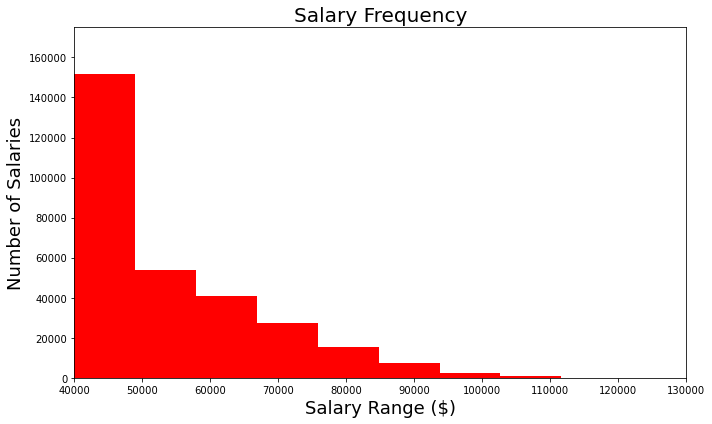

In [13]:
# Create chart
salary_freq = salary_title_df["salary"].plot(kind="hist", xlim=[40000,130000], ylim=[0, 175000], 
                                             figsize=(10,6), color="red")

# Set labels
salary_freq.set_xlabel("Salary Range ($)", fontsize=18)
salary_freq.set_ylabel("Number of Salaries", fontsize=18)
salary_freq.set_title("Salary Frequency", fontsize=20)

# Set layout
plt.tight_layout()

# Show plot
salary_freq = plt.gcf()

plt.show()

In [14]:
#group by title and find mean salary
title_salary = salary_title_df.groupby("title").mean()
title_salary

,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


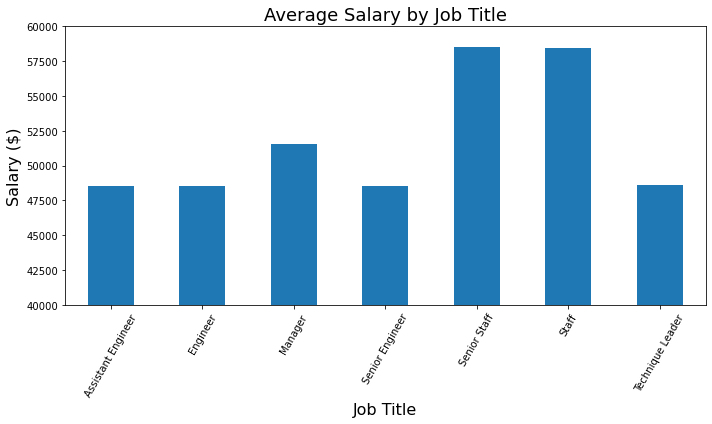

In [15]:
#create chart
salary_chart = title_salary["salary"].plot(kind="bar", ylim=[40000, 60000], figsize=(10,6))

#set labels
salary_chart.set_xlabel("Job Title", fontsize=16)
salary_chart.set_ylabel("Salary ($)", fontsize=16)
salary_chart.set_title("Average Salary by Job Title", fontsize=18)

#set xtick rotations
plt.xticks(rotation=60)


#set layout
plt.tight_layout()

#show plt
salary_chart = plt.gcf()

plt.show()

In [18]:
salary_group_df = salary_title_df.groupby("sex")
salary_group_df = salary_group_df["salary", "sex",].count()
salary_group_df

<ipython-input-18-faab3e6fd45e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salary_group_df = salary_group_df["salary", "sex",].count()


,salary,sex
sex,,
F,120051,120051
M,179973,179973
